This script takes the raw RFU data from SomaLogic, and quantile normalizes the samples. A box plot of all samples is provided at the end of the script to illustrate that all samples have the same distribution and median after quantile normalization. The quantile normalized data is saved in the data directory for all downstream analysis.

In [ ]:
library("dplyr")
#library("ggpubr")
library("ggplot2")
#library("reshape2")
library("preprocessCore")
#read in the proteomics data and the patient demographics data
vasculitis_df <- read.csv("../../data/vasculitis_patients_final.csv")
vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

#get the number of columns and rows 
num_columns <- ncol(vasculitis_df)
num_proteins <- num_columns - 3
num_samples <- nrow(vasculitis_df)

#filter only active gca patients
active_df <- filter(vasculitis_df,vasculitis_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

inactive_df = filter(vasculitis_df,vasculitis_df$Study_group == "Inactive")

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- read.csv("../../data/healthy_controls_final.csv")
controls_proteins_only <- controls_df[,4:num_columns]



proteins_only <- data.frame(vasculitis_df[ ,4:num_columns])

#seperate the protein names for the linear model
protein_names <- data.frame(colnames(proteins_only))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- colnames(proteins_only)

In [2]:
#combine all samples
all_samples_df = rbind(active_df,inactive_df,controls_df)
head(all_samples_df)
dim(all_samples_df)

,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Active,GCA-1,KP9U,705.7,267.1,172.7,949.6,482.0,320.7,3145.9,⋯,626.2,842.9,577.3,440.1,504.3,1118.4,1427.2,1795.7,6410.6,1125.6
2,Active,GCA-2,KP2B,473.4,536.2,134.4,682.3,390.2,301.1,2924.2,⋯,547.4,1119.2,565.1,380.7,618.9,1352.0,1275.9,11532.6,43447.4,7273.0
3,Active,GCA-3,KPAD,516.5,431.2,157.2,647.8,545.0,288.1,2803.9,⋯,590.4,1041.9,616.0,345.9,542.0,1202.2,1361.7,5476.7,30723.4,4180.6
4,Active,GCA-4,KNW9,487.2,701.8,144.9,840.4,406.8,290.4,2663.8,⋯,515.9,2155.9,541.4,408.1,575.7,1128.5,1359.3,6919.7,50644.0,11397.9
5,Active,GCA-5,KP78,455.6,402.7,154.6,665.0,481.5,282.8,2153.9,⋯,992.4,3322.8,746.9,371.0,624.7,1059.0,1284.5,5209.7,30508.9,5020.3
6,Active,GCA-6,KNXC,497.1,280.0,172.0,526.8,432.6,349.1,2630.1,⋯,582.4,1340.4,620.6,434.9,466.7,1188.4,1567.1,2748.6,11143.6,1733.6


[1]   90 7292

In [3]:
#do the quantile normalization

before_quantile_df = data.frame(all_samples_df[1:90,4:num_columns])
dim(before_quantile_df)
#head(before_quantile_df)

transpose_before_quantile_df = t(before_quantile_df)
after_quantile_df = normalize.quantiles(transpose_before_quantile_df)
quantile_df = data.frame(t(after_quantile_df))
colnames(quantile_df) = protein_names[,1]

sample_group_and_id = data.frame(matrix(data=0,nrow=90,ncol=1))
colnames(sample_group_and_id) = "Study_group"
sample_group_and_id$Study_group = all_samples_df$Study_group
sample_group_and_id$maskID = all_samples_df$maskID
sample_group_and_id$sample_ID = all_samples_df$sample_ID
#head(sample_group_and_id)
#combine to save
all_quantile_df = cbind(sample_group_and_id,quantile_df)
head(all_quantile_df)
dim(all_quantile_df)

[1]   90 7289

,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,3847.661,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,2482.319,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,2591.977,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,2273.000,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,2054.692,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,2949.580,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792


[1]   90 7292

In [4]:
#save output
write.csv(all_quantile_df,"../../data/all_quantile_data.csv",row.names=FALSE)
all_quantile_df

Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,3847.661,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.8922
Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,2482.319,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.3922
Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,2591.977,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.3867
Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,2273.000,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.1956
Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,2054.692,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.5067
Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,2949.580,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.7922
Active,GCA-7,KP5K,751.1600,286.1739,182.7400,476.6978,456.7600,318.3378,3070.722,⋯,638.1467,3455.1089,585.5561,484.3544,417.0144,1714.159,1657.674,1514.660,6672.929,1406.2400
Active,GCA-8,KP5H,565.0589,255.7244,238.6189,612.7133,520.0200,339.8789,4249.951,⋯,3291.1044,2135.1567,914.6172,435.6033,629.8294,1308.734,1828.133,1063.328,3779.104,852.2589
Active,GCA-9,KP5Z,596.4578,251.1656,195.4533,648.2811,528.9528,364.6456,7721.606,⋯,712.2556,482.4628,731.8744,471.2217,679.2667,1391.073,1963.039,2711.293,9284.220,945.6828


pdf 
  2

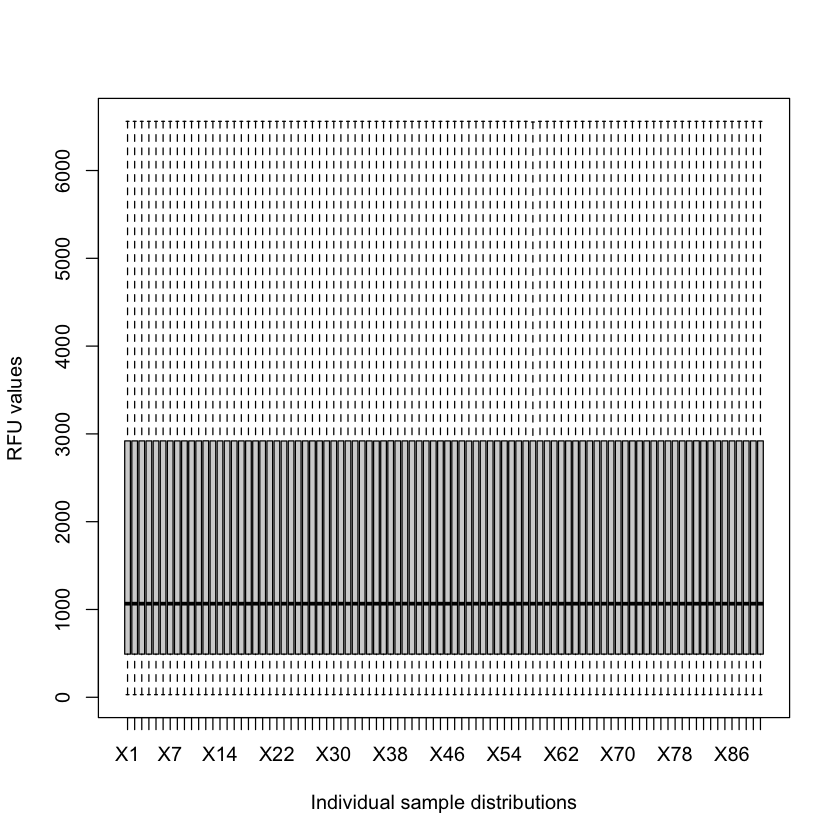

In [5]:
quantile_proteins_only = quantile_df[,1:num_proteins]
#head(quantile_proteins_only)
quantile_proteins_only_transposed = data.frame(t(quantile_proteins_only))
pdf("../../analysis/quantile_normalization/quantile_normalized_samples.pdf")
boxplot(quantile_proteins_only_transposed,outline= FALSE,xlab="Individual sample distributions",ylab="RFU values")
dev.off()
boxplot(quantile_proteins_only_transposed,outline= FALSE,xlab="Individual sample distributions",ylab="RFU values")

In [8]:
#seperate the study groups for machine learning

active_quantile_df = filter(all_quantile_df,all_quantile_df$Study_group == "Active")
head(active_quantile_df)

inactive_quantile_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
head(inactive_quantile_df)

controls_quantile_df = filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
head(controls_quantile_df)

,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,3847.661,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,2482.319,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,2591.977,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,2273.000,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,2054.692,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,2949.580,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792


,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Inactive,GCA-1,KP5W,689.0178,274.6056,173.1122,1164.7911,522.5844,322.5689,4303.878,⋯,666.6633,1980.6800,538.4122,507.4411,586.0383,1256.4778,1651.703,1692.672,8440.326,1184.116
2,Inactive,GCA-2,KP9D,475.3900,554.8667,172.2344,600.3578,408.6544,292.9411,1993.219,⋯,526.1933,1046.8633,583.9578,367.3811,507.5400,1155.1289,1239.287,8182.286,33348.502,6364.926
3,Inactive,GCA-3,KP7J,476.9156,581.6317,155.8267,638.1467,633.3178,290.6289,2164.227,⋯,542.8678,882.8733,549.1667,359.0367,460.9144,974.9522,1200.027,6349.397,27581.852,7687.392
4,Inactive,GCA-4,KNWJ,467.7789,514.2411,185.6056,727.4267,386.6467,279.1222,2012.904,⋯,519.9144,1191.4467,529.7422,349.2056,433.4322,955.2189,1198.394,7337.911,29392.141,5498.241
5,Inactive,GCA-5,KP6N,452.2511,523.2111,160.5967,721.1400,457.7589,305.1294,1871.816,⋯,735.5961,2175.6989,637.8778,372.6867,665.5411,1047.2722,1305.219,5552.857,37079.583,9253.741
6,Inactive,GCA-6,KNU4,497.7811,293.9633,155.8267,574.5467,442.0006,339.7211,2934.574,⋯,580.5678,1497.5211,680.3667,452.1678,562.6778,1161.7922,1529.328,3721.071,17196.722,1881.957


,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,OCRL_10011.65,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Healthy_Control,HC-1,22103004911,447.9694,855.0872,164.3767,660.5022,422.8744,287.5767,2217.774,⋯,504.7800,2792.4756,518.9433,354.9489,536.5900,993.5556,1169.148,7995.020,28914.11,3833.866
2,Healthy_Control,HC-2,22103004912,478.1389,365.5461,134.7733,532.1233,424.5839,289.4133,2731.447,⋯,500.0217,1306.6250,457.6683,417.4611,1731.6678,981.2644,1200.027,4647.830,28307.12,2384.081
3,Healthy_Control,HC-3,22103004913,504.4539,439.1411,145.5850,576.7778,439.8122,407.3522,2979.312,⋯,592.8167,985.9344,540.0411,425.6583,564.3244,971.4783,1386.567,3518.542,21962.87,2646.394
4,Healthy_Control,HC-4,22103004914,476.0956,1163.6611,145.4156,752.9889,451.2756,286.9639,1941.706,⋯,546.8367,1368.2289,535.6422,427.5339,516.1828,1008.0133,1312.342,8330.551,35238.80,5805.591
5,Healthy_Control,HC-5,22103004915,496.7000,890.2022,168.0156,676.9133,451.7144,283.7500,1821.473,⋯,528.6544,1324.5556,558.7711,376.5344,590.6222,1034.3644,1176.541,8316.871,23897.17,4002.177
6,Healthy_Control,HC-6,22103004916,498.5261,681.6583,165.7100,617.2033,405.3394,282.8089,2106.461,⋯,545.1322,1757.8656,443.8833,387.9533,405.8233,878.6800,1219.196,5381.564,30019.63,4016.098


In [10]:
positive_class_labels = data.frame(matrix(data=1,nrow=30,ncol=1))
colnames(positive_class_labels) = "Classifier"
head(positive_class_labels)

negative_class_labels = data.frame(matrix(data=0,nrow=30,ncol=1))
colnames(negative_class_labels) = "Classifier"
head(negative_class_labels)

,Classifier
,<dbl>
1,1
2,1
3,1
4,1
5,1
6,1


,Classifier
,<dbl>
1,0
2,0
3,0
4,0
5,0
6,0


In [14]:
#combine the positive labels and Active GCA and negative labels with controls
active_machine_learning_df = cbind(positive_class_labels,active_quantile_df)
head(active_machine_learning_df)

controls_machine_learning_df = cbind(negative_class_labels,controls_quantile_df)
head(controls_machine_learning_df)

active_and_controls_df = rbind(active_machine_learning_df,controls_machine_learning_df)
head(active_and_controls_df)

#save dataframe
write.csv(active_and_controls_df,"../../data/active_and_controls_machine_learning/all_active_and_controls_machine_learning_final.csv",row.names=FALSE)


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,1,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,1,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,1,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,1,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,1,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Healthy_Control,HC-1,22103004911,447.9694,855.0872,164.3767,660.5022,422.8744,287.5767,⋯,504.7800,2792.4756,518.9433,354.9489,536.5900,993.5556,1169.148,7995.020,28914.11,3833.866
2,0,Healthy_Control,HC-2,22103004912,478.1389,365.5461,134.7733,532.1233,424.5839,289.4133,⋯,500.0217,1306.6250,457.6683,417.4611,1731.6678,981.2644,1200.027,4647.830,28307.12,2384.081
3,0,Healthy_Control,HC-3,22103004913,504.4539,439.1411,145.5850,576.7778,439.8122,407.3522,⋯,592.8167,985.9344,540.0411,425.6583,564.3244,971.4783,1386.567,3518.542,21962.87,2646.394
4,0,Healthy_Control,HC-4,22103004914,476.0956,1163.6611,145.4156,752.9889,451.2756,286.9639,⋯,546.8367,1368.2289,535.6422,427.5339,516.1828,1008.0133,1312.342,8330.551,35238.80,5805.591
5,0,Healthy_Control,HC-5,22103004915,496.7000,890.2022,168.0156,676.9133,451.7144,283.7500,⋯,528.6544,1324.5556,558.7711,376.5344,590.6222,1034.3644,1176.541,8316.871,23897.17,4002.177
6,0,Healthy_Control,HC-6,22103004916,498.5261,681.6583,165.7100,617.2033,405.3394,282.8089,⋯,545.1322,1757.8656,443.8833,387.9533,405.8233,878.6800,1219.196,5381.564,30019.63,4016.098


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,1,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,1,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,1,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,1,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,1,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792


In [17]:
#combine the positive labels and Inactive GCA and negative labels with controls
inactive_machine_learning_df = cbind(positive_class_labels,inactive_quantile_df)
head(inactive_machine_learning_df)

controls_machine_learning_df = cbind(negative_class_labels,controls_quantile_df)
head(controls_machine_learning_df)

inactive_and_controls_df = rbind(inactive_machine_learning_df,controls_machine_learning_df)
head(inactive_and_controls_df)

#save dataframe
write.csv(inactive_and_controls_df,"../../data/inactive_and_controls_machine_learning/all_inactive_and_controls_machine_learning_final.csv",row.names=FALSE)


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Inactive,GCA-1,KP5W,689.0178,274.6056,173.1122,1164.7911,522.5844,322.5689,⋯,666.6633,1980.6800,538.4122,507.4411,586.0383,1256.4778,1651.703,1692.672,8440.326,1184.116
2,1,Inactive,GCA-2,KP9D,475.3900,554.8667,172.2344,600.3578,408.6544,292.9411,⋯,526.1933,1046.8633,583.9578,367.3811,507.5400,1155.1289,1239.287,8182.286,33348.502,6364.926
3,1,Inactive,GCA-3,KP7J,476.9156,581.6317,155.8267,638.1467,633.3178,290.6289,⋯,542.8678,882.8733,549.1667,359.0367,460.9144,974.9522,1200.027,6349.397,27581.852,7687.392
4,1,Inactive,GCA-4,KNWJ,467.7789,514.2411,185.6056,727.4267,386.6467,279.1222,⋯,519.9144,1191.4467,529.7422,349.2056,433.4322,955.2189,1198.394,7337.911,29392.141,5498.241
5,1,Inactive,GCA-5,KP6N,452.2511,523.2111,160.5967,721.1400,457.7589,305.1294,⋯,735.5961,2175.6989,637.8778,372.6867,665.5411,1047.2722,1305.219,5552.857,37079.583,9253.741
6,1,Inactive,GCA-6,KNU4,497.7811,293.9633,155.8267,574.5467,442.0006,339.7211,⋯,580.5678,1497.5211,680.3667,452.1678,562.6778,1161.7922,1529.328,3721.071,17196.722,1881.957


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Healthy_Control,HC-1,22103004911,447.9694,855.0872,164.3767,660.5022,422.8744,287.5767,⋯,504.7800,2792.4756,518.9433,354.9489,536.5900,993.5556,1169.148,7995.020,28914.11,3833.866
2,0,Healthy_Control,HC-2,22103004912,478.1389,365.5461,134.7733,532.1233,424.5839,289.4133,⋯,500.0217,1306.6250,457.6683,417.4611,1731.6678,981.2644,1200.027,4647.830,28307.12,2384.081
3,0,Healthy_Control,HC-3,22103004913,504.4539,439.1411,145.5850,576.7778,439.8122,407.3522,⋯,592.8167,985.9344,540.0411,425.6583,564.3244,971.4783,1386.567,3518.542,21962.87,2646.394
4,0,Healthy_Control,HC-4,22103004914,476.0956,1163.6611,145.4156,752.9889,451.2756,286.9639,⋯,546.8367,1368.2289,535.6422,427.5339,516.1828,1008.0133,1312.342,8330.551,35238.80,5805.591
5,0,Healthy_Control,HC-5,22103004915,496.7000,890.2022,168.0156,676.9133,451.7144,283.7500,⋯,528.6544,1324.5556,558.7711,376.5344,590.6222,1034.3644,1176.541,8316.871,23897.17,4002.177
6,0,Healthy_Control,HC-6,22103004916,498.5261,681.6583,165.7100,617.2033,405.3394,282.8089,⋯,545.1322,1757.8656,443.8833,387.9533,405.8233,878.6800,1219.196,5381.564,30019.63,4016.098


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Inactive,GCA-1,KP5W,689.0178,274.6056,173.1122,1164.7911,522.5844,322.5689,⋯,666.6633,1980.6800,538.4122,507.4411,586.0383,1256.4778,1651.703,1692.672,8440.326,1184.116
2,1,Inactive,GCA-2,KP9D,475.3900,554.8667,172.2344,600.3578,408.6544,292.9411,⋯,526.1933,1046.8633,583.9578,367.3811,507.5400,1155.1289,1239.287,8182.286,33348.502,6364.926
3,1,Inactive,GCA-3,KP7J,476.9156,581.6317,155.8267,638.1467,633.3178,290.6289,⋯,542.8678,882.8733,549.1667,359.0367,460.9144,974.9522,1200.027,6349.397,27581.852,7687.392
4,1,Inactive,GCA-4,KNWJ,467.7789,514.2411,185.6056,727.4267,386.6467,279.1222,⋯,519.9144,1191.4467,529.7422,349.2056,433.4322,955.2189,1198.394,7337.911,29392.141,5498.241
5,1,Inactive,GCA-5,KP6N,452.2511,523.2111,160.5967,721.1400,457.7589,305.1294,⋯,735.5961,2175.6989,637.8778,372.6867,665.5411,1047.2722,1305.219,5552.857,37079.583,9253.741
6,1,Inactive,GCA-6,KNU4,497.7811,293.9633,155.8267,574.5467,442.0006,339.7211,⋯,580.5678,1497.5211,680.3667,452.1678,562.6778,1161.7922,1529.328,3721.071,17196.722,1881.957


In [20]:
#now use positive labels for Active and negative labels for Inactive
active_machine_learning_df = cbind(positive_class_labels,active_quantile_df)
head(active_machine_learning_df)

inactive_machine_learning_df = cbind(negative_class_labels,inactive_quantile_df)
head(inactive_machine_learning_df)

active_and_inactive_df = rbind(active_machine_learning_df,inactive_machine_learning_df)
head(active_and_inactive_df)
write.csv(active_and_inactive_df,"../../data/active_and_inactive_machine_learning/all_active_and_inactive_machine_learning_final.csv",row.names=FALSE)

,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,1,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,1,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,1,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,1,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,1,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Inactive,GCA-1,KP5W,689.0178,274.6056,173.1122,1164.7911,522.5844,322.5689,⋯,666.6633,1980.6800,538.4122,507.4411,586.0383,1256.4778,1651.703,1692.672,8440.326,1184.116
2,0,Inactive,GCA-2,KP9D,475.3900,554.8667,172.2344,600.3578,408.6544,292.9411,⋯,526.1933,1046.8633,583.9578,367.3811,507.5400,1155.1289,1239.287,8182.286,33348.502,6364.926
3,0,Inactive,GCA-3,KP7J,476.9156,581.6317,155.8267,638.1467,633.3178,290.6289,⋯,542.8678,882.8733,549.1667,359.0367,460.9144,974.9522,1200.027,6349.397,27581.852,7687.392
4,0,Inactive,GCA-4,KNWJ,467.7789,514.2411,185.6056,727.4267,386.6467,279.1222,⋯,519.9144,1191.4467,529.7422,349.2056,433.4322,955.2189,1198.394,7337.911,29392.141,5498.241
5,0,Inactive,GCA-5,KP6N,452.2511,523.2111,160.5967,721.1400,457.7589,305.1294,⋯,735.5961,2175.6989,637.8778,372.6867,665.5411,1047.2722,1305.219,5552.857,37079.583,9253.741
6,0,Inactive,GCA-6,KNU4,497.7811,293.9633,155.8267,574.5467,442.0006,339.7211,⋯,580.5678,1497.5211,680.3667,452.1678,562.6778,1161.7922,1529.328,3721.071,17196.722,1881.957


,Classifier,Study_group,maskID,sample_ID,CRBB2_10000.28,c.Raf_10001.7,ZNF41_10003.15,ELK1_10006.25,GUC1A_10008.43,BECN1_10010.10,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Active,GCA-1,KP9U,736.6811,263.2578,164.6267,1016.6900,488.2100,317.2122,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
2,1,Active,GCA-2,KP2B,473.1556,526.9378,143.2222,661.9756,397.4789,310.1211,⋯,536.3544,1042.0389,552.7311,387.5178,605.9822,1234.590,1167.748,8864.027,31542.227,5728.392
3,1,Active,GCA-3,KPAD,520.8056,442.3544,170.1133,637.1428,549.4656,301.0456,⋯,588.2394,991.7456,613.0211,359.5189,545.6078,1136.669,1287.748,4975.490,26036.424,3776.387
4,1,Active,GCA-4,KNW9,483.7422,676.9133,155.0411,800.4522,407.4244,296.7294,⋯,511.4722,1897.2000,536.5900,408.7339,569.9722,1042.482,1251.138,5413.889,36101.654,8674.196
5,1,Active,GCA-5,KP78,457.7589,406.5856,160.4606,665.1056,482.3789,281.8600,⋯,973.7956,3083.5344,746.9222,373.0856,625.3311,1035.574,1246.180,4765.277,25412.641,4590.507
6,1,Active,GCA-6,KNXC,512.0444,284.8667,171.8450,544.2533,444.9117,356.1400,⋯,607.5050,1449.8700,646.5733,447.7750,480.3767,1285.351,1696.619,3109.569,14203.179,1900.792
